# Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Verilerin Getirilmesi

In [2]:
columns=['BranchId','Date_','StockId','Type','Quantity','Unit','MovementType','FicheNo','FicheNoText','StockLink']
data_2021 = pd.read_excel('csv/stock-movement-2021.xlsx')
data_2022 = pd.read_excel('csv/stock-movement-2022.xlsx')

In [3]:
data_2021.columns = columns
data_2022.drop(labels=['id'],axis= 1, inplace=True)
data = pd.concat([data_2021[data_2021.StockId == 2], data_2022[data_2022.StockId == 2]], axis = 0, ignore_index=True)
print('Orjinal Veri Uzunluğu: ', len(data_2022))
print('Sadece Un Verisinin Uzunluğu: ',len(data))

Orjinal Veri Uzunluğu:  146946
Sadece Un Verisinin Uzunluğu:  4337


# Veriye Bakış

In [4]:
data.head()

,BranchId,Date_,StockId,Type,Quantity,Unit,MovementType,FicheNo,FicheNoText,StockLink
0,90,2020-12-31,2,1,78850.0,KG,Devir,0,DEVIR,NaN
1,4,2021-06-03,2,1,30.0,KG,Iç Tedarik,0,A90000000261270,NaN
2,90,2021-01-15,2,1,0.0,KG,Tedarikçiden Gelen Mal,0,000000000321949,NaN
3,90,2021-01-15,2,1,25000.0,KG,Tedarikçiden Gelen Mal,0,TZD202100000141,NaN
4,90,2021-01-18,2,1,15000.0,KG,Tedarikçiden Gelen Mal,0,TZD202100000163,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BranchId      4337 non-null   int64  
 1   Date_         4337 non-null   object 
 2   StockId       4337 non-null   int64  
 3   Type          4337 non-null   int64  
 4   Quantity      4337 non-null   float64
 5   Unit          4337 non-null   object 
 6   MovementType  4337 non-null   object 
 7   FicheNo       4337 non-null   int64  
 8   FicheNoText   4337 non-null   object 
 9   StockLink     4032 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 339.0+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BranchId,4337.0,38.949504,43.174039,0.0,2.00,4.000,90.0,90.0
StockId,4337.0,2.000000,0.000000,2.0,2.00,2.000,2.0,2.0
Type,4337.0,-0.859811,0.510671,-1.0,-1.00,-1.000,-1.0,1.0
Quantity,4337.0,2183.478755,5545.352897,0.0,0.76,29.746,2350.0,96840.0
FicheNo,4337.0,0.000000,0.000000,0.0,0.00,0.000,0.0,0.0


In [7]:
data.corr()

,BranchId,StockId,Type,Quantity,FicheNo
BranchId,1.000000,NaN,0.322877,0.460771,NaN
StockId,NaN,NaN,NaN,NaN,NaN
Type,0.322877,NaN,1.000000,0.695384,NaN
Quantity,0.460771,NaN,0.695384,1.000000,NaN
FicheNo,NaN,NaN,NaN,NaN,NaN


In [8]:
data.groupby(['MovementType'])['Quantity'].sum()

MovementType
Devir                      272530.000
Gönderilen Mal                 30.000
Iade                            1.000
Iç Tedarik                     30.000
Tedarikçiden Gelen Mal    4660500.000
Üretime Giden Mal         4536656.361
Name: Quantity, dtype: float64

## Gereksiz kolonların düşürülmesi

In [9]:
data.drop(labels=['Unit','FicheNo'], axis = 1, inplace = True)

In [10]:
data.head()

,BranchId,Date_,StockId,Type,Quantity,MovementType,FicheNoText,StockLink
0,90,2020-12-31,2,1,78850.0,Devir,DEVIR,NaN
1,4,2021-06-03,2,1,30.0,Iç Tedarik,A90000000261270,NaN
2,90,2021-01-15,2,1,0.0,Tedarikçiden Gelen Mal,000000000321949,NaN
3,90,2021-01-15,2,1,25000.0,Tedarikçiden Gelen Mal,TZD202100000141,NaN
4,90,2021-01-18,2,1,15000.0,Tedarikçiden Gelen Mal,TZD202100000163,NaN


In [11]:
# dates Beginning 2020-12-31
data['Date_'] = pd.to_datetime(data['Date_'].astype('str'), infer_datetime_format = True)
data['day_of_year'] = data['Date_'].dt.dayofyear
data['day_of_year'] = pd.DataFrame(data['day_of_year'])
data['day_numbers'] = (data['Date_'] - min(data['Date_'])).dt.days
data['day_of_year'] = data['day_of_year'].replace([366],[0])

In [12]:
data.head()

,BranchId,Date_,StockId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers
0,90,2020-12-31,2,1,78850.0,Devir,DEVIR,NaN,0,0
1,4,2021-06-03,2,1,30.0,Iç Tedarik,A90000000261270,NaN,154,154
2,90,2021-01-15,2,1,0.0,Tedarikçiden Gelen Mal,000000000321949,NaN,15,15
3,90,2021-01-15,2,1,25000.0,Tedarikçiden Gelen Mal,TZD202100000141,NaN,15,15
4,90,2021-01-18,2,1,15000.0,Tedarikçiden Gelen Mal,TZD202100000163,NaN,18,18


## Şube ve Ürün Tipine Göre Toplamlar

In [13]:
subeler = data.groupby('BranchId')
stok_ids = data.groupby('StockId')
sum = 0
for sube in subeler.groups.keys():
    for stok_id in stok_ids.groups.keys():
        for i in range(len(subeler.get_group(sube)[data.StockId == stok_id]['Quantity'])):
            sum = (np.array(subeler.get_group(sube)[data.StockId == stok_id]['Quantity'])[i] * np.array(subeler.get_group(sube)[data.StockId == stok_id]['Type'])[i]) + sum
        if sum!=0:
            print(sube, ' Nolu şubenin ',stok_id, ' Nolu stoğunun toplamı = ', sum)
        sum = 0

0  Nolu şubenin  2  Nolu stoğunun toplamı =  -1.0
2  Nolu şubenin  2  Nolu stoğunun toplamı =  -42623.183500000094
4  Nolu şubenin  2  Nolu stoğunun toplamı =  -15708.177500000009
90  Nolu şubenin  2  Nolu stoğunun toplamı =  454705.0


## Ürün Tipine Göre Toplamlar

In [14]:
stok_ids = data.groupby('StockId')
sum = 0
sum_list = np.array([])
for stok_id in stok_ids.groups.keys():
    for i in range(len(data[data.StockId == stok_id])):
        sum = (np.array(data[data.StockId == stok_id]['Quantity'])[i] * np.array(data[data.StockId == stok_id]['Type'])[i]) + sum
    sum_list = np.append(sum_list, sum)
    print(stok_id, ' Nolu stoğunun toplamı = ', sum)
    sum = 0
print('All sum is ', np.sum(sum_list))

2  Nolu stoğunun toplamı =  396372.63900000043
All sum is  396372.63900000043


## Features Engineering

In [15]:
data.drop(data[data['StockId'] != 2].index, inplace=True)

In [16]:
data['month'] = data['Date_'].dt.month
data['day_of_month'] = data['Date_'].dt.day
data['week_of_year'] = data['Date_'].dt.weekofyear
data['day_of_week'] = data['Date_'].dt.dayofweek
data["is_wknd"] = data['Date_'].dt.weekday // 5
# Aşağıdaki özellikleri OLS raporunda p değeri 0.05 in üstünde çıktığı için koymamayı tercih ettim.
#data['is_month_start'] = data['Date_'].dt.is_month_start.astype(int)
#data['is_month_end'] = data['Date_'].dt.is_month_end.astype(int)

In [17]:
data.drop(labels=['StockId','Date_'], axis = 1, inplace = True)

In [18]:
data.head()

,BranchId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd
0,90,1,78850.0,Devir,DEVIR,NaN,0,0,12,31,53,3,0
1,4,1,30.0,Iç Tedarik,A90000000261270,NaN,154,154,6,3,22,3,0
2,90,1,0.0,Tedarikçiden Gelen Mal,000000000321949,NaN,15,15,1,15,2,4,0
3,90,1,25000.0,Tedarikçiden Gelen Mal,TZD202100000141,NaN,15,15,1,15,2,4,0
4,90,1,15000.0,Tedarikçiden Gelen Mal,TZD202100000163,NaN,18,18,1,18,3,0,0


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BranchId,4337.0,38.949504,43.174039,0.0,2.00,4.000,90.0,90.0
Type,4337.0,-0.859811,0.510671,-1.0,-1.00,-1.000,-1.0,1.0
Quantity,4337.0,2183.478755,5545.352897,0.0,0.76,29.746,2350.0,96840.0
day_of_year,4337.0,169.998617,102.195132,0.0,90.00,155.000,263.0,365.0
day_numbers,4337.0,340.842518,150.461148,0.0,244.00,352.000,460.0,588.0
month,4337.0,5.921605,3.394745,1.0,3.00,6.000,9.0,12.0
day_of_month,4337.0,21.206825,9.704935,1.0,13.00,24.000,30.0,31.0
week_of_year,4337.0,24.460918,14.562323,1.0,13.00,22.000,38.0,53.0
day_of_week,4337.0,2.582430,1.846058,0.0,1.00,3.000,4.0,6.0
is_wknd,4337.0,0.176620,0.381391,0.0,0.00,0.000,0.0,1.0


In [20]:
ilk_devir = data.iloc[[0]]
devirsiz = data[data['MovementType']!= 'Devir']
data = pd.concat([ilk_devir, devirsiz], axis = 0)
print(data.head())

   BranchId  Type  Quantity            MovementType      FicheNoText  \
0        90     1   78850.0                   Devir            DEVIR   
1         4     1      30.0              Iç Tedarik  A90000000261270   
2        90     1       0.0  Tedarikçiden Gelen Mal  000000000321949   
3        90     1   25000.0  Tedarikçiden Gelen Mal  TZD202100000141   
4        90     1   15000.0  Tedarikçiden Gelen Mal  TZD202100000163   

  StockLink  day_of_year  day_numbers  month  day_of_month  week_of_year  \
0       NaN            0            0     12            31            53   
1       NaN          154          154      6             3            22   
2       NaN           15           15      1            15             2   
3       NaN           15           15      1            15             2   
4       NaN           18           18      1            18             3   

   day_of_week  is_wknd  
0            3        0  
1            3        0  
2            4        0  
3     

# Burası Önemli

In [21]:
#data = data[data['day_numbers'] <= 479]

# Günlük Toplam Un Verileri

In [22]:
sum = 0
sum_list = np.array([])
days = data['day_numbers'].unique()
days = np.sort(days)
for day in days: #0
    for i in range(len(data[data['day_numbers']==day]['day_numbers'])):
        sum = sum  + (np.array(data[data['day_numbers'] == day]['Quantity'])[i] * np.array(data[data['day_numbers'] == day]['Type'])[i]) 
    sum_list = np.append(sum_list, sum)
    print(day,' is ', sum)
    #Kümülatif toplam için aşağıdaki satırı sil
    sum = 0

0  is  78850.0
2  is  -4750.0
3  is  -100.0
4  is  -6250.0
5  is  -5850.0
6  is  -5750.0
7  is  -5550.0
8  is  -6350.0
9  is  -4250.0
10  is  -250.0
11  is  -5900.0
12  is  -5400.0
13  is  -5200.0
14  is  -5400.0
15  is  19000.0
16  is  -4600.0
17  is  -300.0
18  is  8800.0
19  is  -5450.0
20  is  -5650.0
21  is  -5650.0
22  is  18200.0
23  is  -4950.0
24  is  -350.0
25  is  18350.0
26  is  -5750.0
27  is  9050.0
28  is  -5750.0
29  is  -6850.0
30  is  -5050.0
31  is  -4259.771699999999
32  is  -6800.0
33  is  19050.0
34  is  -6100.0
35  is  -6000.0
36  is  -6900.0
37  is  -5250.0
38  is  -600.0
39  is  -6650.0
40  is  21300.0
41  is  -5650.0
42  is  -5400.0
43  is  20650.0
44  is  -5250.0
45  is  -550.0
46  is  -6700.0
47  is  -5450.0
48  is  -5500.0
49  is  -5550.0
50  is  18450.0
51  is  -5250.0
52  is  -650.0
53  is  -6550.0
54  is  19350.0
55  is  -6000.0
56  is  -5850.0
57  is  -7050.0
58  is  -4700.0
59  is  -1597.9353999999996
60  is  19950.0
61  is  -6150.0
62  is  -6200.0
63 

546  is  -17685.490600000005
547  is  -15800.0
548  is  -15800.0
550  is  38100.0
551  is  -15100.0
552  is  39400.0
553  is  38900.0
554  is  -23500.0
559  is  -15300.0
560  is  -13200.0
561  is  -12520.0
562  is  -11800.0
564  is  -12900.0
565  is  40000.0
566  is  -12500.0
567  is  -12000.0
568  is  -43730.0
569  is  -12100.0
571  is  -13100.0
572  is  -12800.0
573  is  -6500.0
574  is  96034.98799999997
575  is  41579.42999999999
576  is  -12100.0
577  is  -8269.993999999997
578  is  -12300.0
579  is  -11300.0
580  is  -11700.0
581  is  -11400.0
582  is  -11200.0
583  is  -11400.0
585  is  -11900.0
586  is  -11200.0
587  is  -11500.0
588  is  -11100.0


# Günlük  Kümülatif Toplam Un Grafiği

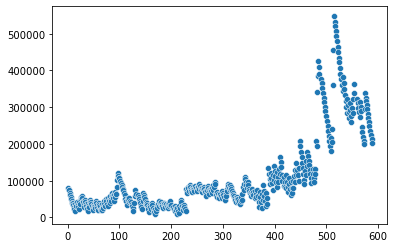

<Figure size 3600x3600 with 0 Axes>

In [23]:
sum = 0
sum_list = np.array([])
days = data['day_numbers'].unique()
days = np.sort(days)
for day in days: #2 - 588
    for i in range(len(data[data['day_numbers']==day]['day_numbers'])):
        sum = sum  + (np.array(data[data['day_numbers'] == day]['Quantity'])[i] * np.array(data[data['day_numbers'] == day]['Type'])[i]) 
    sum_list = np.append(sum_list, sum)
sns.scatterplot(x= days, y=sum_list)
plt.figure(figsize = (50,50))
plt.show()

In [24]:
sum = 0
sum_list = np.array([])
data = data.sort_values(by=['day_numbers'])
for i in range(len(data['day_numbers'])):
    sum = sum  + (np.array(data['Quantity'])[i] * np.array(data['Type'])[i]) 
    sum_list = np.append(sum_list, sum)
data['Cumulative'] = sum_list

In [25]:
data['FicheNoText'] = data['FicheNoText'].astype(str)

## Sadece Un Verisini Excel ve Csv Dosyalarına Kaydetme

In [26]:
file_name = "un_2021_2022.xlsx"
data.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [27]:
file_name = "un_2021_2022.csv"
data.to_csv(file_name)
print('DataFrame is written to CSV File successfully.')

DataFrame is written to CSV File successfully.


# Label Encoder

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['MovementType'] = le.fit_transform(data['MovementType'])
data['FicheNoText'] = le.fit_transform(data['FicheNoText'])
data['StockLink'] = le.fit_transform(data['StockLink'])
data['FicheNoText'] = pd.to_numeric(data['FicheNoText'])
data.head()

,BranchId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd,Cumulative
0,90,1,78850.0,0,1241,18,0,0,12,31,53,3,0,78850.0
1655,90,-1,2900.0,5,0,1,2,2,1,2,53,5,1,75950.0
1656,90,-1,1850.0,5,1,2,2,2,1,2,53,5,1,74100.0
1657,90,-1,100.0,5,61,1,3,3,1,3,53,6,1,74000.0
1658,90,-1,3550.0,5,2,1,4,4,1,4,1,0,0,70450.0


In [29]:
data.head()

,BranchId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd,Cumulative
0,90,1,78850.0,0,1241,18,0,0,12,31,53,3,0,78850.0
1655,90,-1,2900.0,5,0,1,2,2,1,2,53,5,1,75950.0
1656,90,-1,1850.0,5,1,2,2,2,1,2,53,5,1,74100.0
1657,90,-1,100.0,5,61,1,3,3,1,3,53,6,1,74000.0
1658,90,-1,3550.0,5,2,1,4,4,1,4,1,0,0,70450.0


## Standard Scale

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
types = data.iloc[:, 1:2]
data1 = data.iloc[:,0:1]
data2 = data.iloc[: ,2:]
columns=['BranchId','Quantity','MovementType','FicheNoText','StockLink','day_of_year','day_numbers','month','day_of_month','week_of_year',
        'day_of_week','is_wknd','Cumulative']
others = pd.concat([data1, data2],ignore_index=True, axis = 1)
others.columns = columns = columns

In [32]:
others.head() 

,BranchId,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd,Cumulative
0,90,78850.0,0,1241,18,0,0,12,31,53,3,0,78850.0
1655,90,2900.0,5,0,1,2,2,1,2,53,5,1,75950.0
1656,90,1850.0,5,1,2,2,2,1,2,53,5,1,74100.0
1657,90,100.0,5,61,1,3,3,1,3,53,6,1,74000.0
1658,90,3550.0,5,2,1,4,4,1,4,1,0,0,70450.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(others, types, test_size = 0.2)

# XG-Boost

In [34]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
for i in range(len(preds)):
    print(np.array(X_test['day_numbers'])[i], ' day preds is ', preds[i], '|| index = ', X_test.index[i])

[13:09:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
124  day preds is  -1 || index =  1819
258  day preds is  -1 || index =  2214
501  day preds is  -1 || index =  4245
193  day preds is  -1 || index =  1936
485  day preds is  -1 || index =  3768
454  day preds is  -1 || index =  3152
90  day preds is  -1 || index =  933
98  day preds is  -1 || index =  1564
260  day preds is  1 || index =  152
411  day preds is  -1 || index =  3543
413  day preds is  -1 || index =  2840
285  day preds is  -1 || index =  1134
120  day preds is  -1 || index =  444
232  day preds is  1 || index =  146
516  day preds is  -1 || index =  3801
288  day preds is  -1 || index =  1026
251  day preds is  -1 || index =  1119
396  day preds is  -1 || index =  3458
305  day preds is  -1 || index =  421
575  day preds i

79  day preds is  -1 || index =  2180
577  day preds is  -1 || index =  2779
427  day preds is  1 || index =  3324
546  day preds is  -1 || index =  2524
319  day preds is  -1 || index =  1295
278  day preds is  -1 || index =  1176
204  day preds is  -1 || index =  1950
347  day preds is  -1 || index =  1771
53  day preds is  -1 || index =  2131
263  day preds is  1 || index =  64
102  day preds is  -1 || index =  1571
506  day preds is  -1 || index =  3045
396  day preds is  -1 || index =  3595
281  day preds is  -1 || index =  1183
396  day preds is  -1 || index =  3392
304  day preds is  -1 || index =  1413
516  day preds is  -1 || index =  3557
520  day preds is  -1 || index =  4308
453  day preds is  -1 || index =  4167
462  day preds is  -1 || index =  2861
267  day preds is  -1 || index =  2059
546  day preds is  -1 || index =  3743
104  day preds is  -1 || index =  1576
516  day preds is  -1 || index =  2785
268  day preds is  -1 || index =  2235
424  day preds is  -1 || index 

# Light GBM

In [35]:
import lightgbm as lgb

In [36]:
lgb_model = lgb.LGBMClassifier(colsample_bytree=1,
                             learning_rate=0.01,
                             max_depth=9,
                             n_estimators = 1500)
lgb_model.fit(X_train, y_train)
predicts = lgb_model.predict(X_test)
for i in range(len(predicts)):
    print(np.array(X_test['day_numbers'])[i], ' day preds is ', predicts[i])

124  day preds is  -1
258  day preds is  -1
501  day preds is  -1
193  day preds is  -1
485  day preds is  -1
454  day preds is  -1
90  day preds is  -1
98  day preds is  -1
260  day preds is  1
411  day preds is  -1
413  day preds is  -1
285  day preds is  -1
120  day preds is  -1
232  day preds is  1
516  day preds is  -1
288  day preds is  -1
251  day preds is  -1
396  day preds is  -1
305  day preds is  -1
575  day preds is  -1
40  day preds is  1
574  day preds is  -1
478  day preds is  -1
482  day preds is  1
520  day preds is  -1
575  day preds is  -1
485  day preds is  -1
587  day preds is  -1
424  day preds is  -1
379  day preds is  -1
424  day preds is  -1
99  day preds is  -1
256  day preds is  -1
357  day preds is  -1
59  day preds is  -1
446  day preds is  -1
90  day preds is  -1
420  day preds is  -1
90  day preds is  -1
284  day preds is  -1
259  day preds is  -1
281  day preds is  -1
424  day preds is  -1
456  day preds is  -1
334  day preds is  -1
577  day preds is  -1

## Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [38]:
classifier = RandomForestClassifier(n_estimators=1600,
                                 min_samples_split=5,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 max_depth=10,
                                 bootstrap=True)
classifier.fit(X_train, y_train)
rfg_pred = classifier.predict(X_test)

In [39]:
for i in range(len(rfg_pred)):
    print(np.array(X_test['day_numbers'])[i], ' day preds is ', rfg_pred[i], '|| index = ',X_test.index[i])

124  day preds is  -1 || index =  1819
258  day preds is  -1 || index =  2214
501  day preds is  -1 || index =  4245
193  day preds is  -1 || index =  1936
485  day preds is  -1 || index =  3768
454  day preds is  -1 || index =  3152
90  day preds is  -1 || index =  933
98  day preds is  -1 || index =  1564
260  day preds is  1 || index =  152
411  day preds is  -1 || index =  3543
413  day preds is  -1 || index =  2840
285  day preds is  -1 || index =  1134
120  day preds is  -1 || index =  444
232  day preds is  1 || index =  146
516  day preds is  -1 || index =  3801
288  day preds is  -1 || index =  1026
251  day preds is  -1 || index =  1119
396  day preds is  -1 || index =  3458
305  day preds is  -1 || index =  421
575  day preds is  -1 || index =  2787
40  day preds is  1 || index =  9
574  day preds is  -1 || index =  3830
478  day preds is  -1 || index =  2728
482  day preds is  1 || index =  2361
520  day preds is  -1 || index =  3293
575  day preds is  -1 || index =  2807
4

90  day preds is  -1 || index =  681
503  day preds is  -1 || index =  3042
288  day preds is  -1 || index =  864
31  day preds is  -1 || index =  236
90  day preds is  -1 || index =  1160
273  day preds is  -1 || index =  1329
301  day preds is  -1 || index =  1289
270  day preds is  -1 || index =  2063
251  day preds is  -1 || index =  2203
304  day preds is  -1 || index =  921
217  day preds is  -1 || index =  1116
396  day preds is  -1 || index =  3850
194  day preds is  -1 || index =  1938
546  day preds is  -1 || index =  3697
328  day preds is  -1 || index =  982
449  day preds is  -1 || index =  3970
285  day preds is  -1 || index =  1477
181  day preds is  -1 || index =  1072
291  day preds is  -1 || index =  587
125  day preds is  -1 || index =  1821
149  day preds is  -1 || index =  1863
293  day preds is  -1 || index =  908
330  day preds is  -1 || index =  1743
281  day preds is  -1 || index =  464
365  day preds is  -1 || index =  234
128  day preds is  -1 || index =  182

# Accuracy Score

In [40]:
print('LİGHT-GBM Accuracy Score: ',accuracy_score(y_test, predicts))
print('XG-Boost Accuracy Score: ',accuracy_score(y_test, preds))
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test, rfg_pred))

LİGHT-GBM Accuracy Score:  1.0
XG-Boost Accuracy Score:  1.0
Random Forest Classifier Accuracy Score:  1.0


# Son %10'luk kısım predict

In [41]:
samples_len = len(data) * 0.1
sample_data = data.iloc[(-1 * int(samples_len)):-1]
data1 = sample_data.iloc[:,0:1]
data2 = sample_data.iloc[: ,2:]
columns=['BranchId','Quantity','MovementType','FicheNoText','StockLink','day_of_year','day_numbers','month','day_of_month','week_of_year',
        'day_of_week','is_wknd','Cumulative']
sample_others = pd.concat([data1, data2],ignore_index=True, axis = 1)

## Orjinal Kümülatif Veriler Üzerinden Kontrol Etmek

In [42]:
for i in range(len(sample_data['Cumulative']) - 1):
    if sample_data['Type'].iloc[i] == 1:
        print( 'Alınan Gün: ', sample_data['day_numbers'].iloc[i],
             '|Index',sample_data.index[i],
             '| Miktar',sample_data['Quantity'].iloc[i])              

Alınan Gün:  532 |Index 3333 | Miktar 27000.0
Alınan Gün:  532 |Index 2317 | Miktar 27000.0
Alınan Gün:  540 |Index 2365 | Miktar 27000.0
Alınan Gün:  540 |Index 3381 | Miktar 27000.0
Alınan Gün:  545 |Index 3334 | Miktar 27000.0
Alınan Gün:  545 |Index 2318 | Miktar 27000.0
Alınan Gün:  550 |Index 2350 | Miktar 27000.0
Alınan Gün:  550 |Index 3366 | Miktar 27000.0
Alınan Gün:  552 |Index 2338 | Miktar 27000.0
Alınan Gün:  552 |Index 3354 | Miktar 27000.0
Alınan Gün:  553 |Index 2351 | Miktar 26500.0
Alınan Gün:  553 |Index 3367 | Miktar 26500.0
Alınan Gün:  565 |Index 3335 | Miktar 26500.0
Alınan Gün:  565 |Index 2319 | Miktar 26500.0
Alınan Gün:  573 |Index 2320 | Miktar 3000.0
Alınan Gün:  573 |Index 3336 | Miktar 3000.0
Alınan Gün:  574 |Index 3337 | Miktar 27000.0
Alınan Gün:  574 |Index 3355 | Miktar 27000.0
Alınan Gün:  574 |Index 2339 | Miktar 27000.0
Alınan Gün:  574 |Index 2321 | Miktar 27000.0
Alınan Gün:  575 |Index 2340 | Miktar 27000.0
Alınan Gün:  575 |Index 3356 | Mikta

## Makine Öğrenmesi Verileri Üzerinden Kontrol Etmek

In [43]:
rfg_pred = classifier.predict(sample_others)
for i in range(len(rfg_pred) - 1):
    if rfg_pred[i] == 1:
        print('Alınan Gün: ', sample_data['day_numbers'].iloc[i],
             '|Index',sample_data.index[i],
             '| Miktar',sample_data['Quantity'].iloc[i])      

Alınan Gün:  532 |Index 3333 | Miktar 27000.0
Alınan Gün:  532 |Index 2317 | Miktar 27000.0
Alınan Gün:  540 |Index 2365 | Miktar 27000.0
Alınan Gün:  540 |Index 3381 | Miktar 27000.0
Alınan Gün:  545 |Index 3334 | Miktar 27000.0
Alınan Gün:  545 |Index 2318 | Miktar 27000.0
Alınan Gün:  550 |Index 2350 | Miktar 27000.0
Alınan Gün:  550 |Index 3366 | Miktar 27000.0
Alınan Gün:  552 |Index 2338 | Miktar 27000.0
Alınan Gün:  552 |Index 3354 | Miktar 27000.0
Alınan Gün:  553 |Index 2351 | Miktar 26500.0
Alınan Gün:  553 |Index 3367 | Miktar 26500.0
Alınan Gün:  565 |Index 3335 | Miktar 26500.0
Alınan Gün:  565 |Index 2319 | Miktar 26500.0
Alınan Gün:  573 |Index 2320 | Miktar 3000.0
Alınan Gün:  573 |Index 3336 | Miktar 3000.0
Alınan Gün:  574 |Index 3337 | Miktar 27000.0
Alınan Gün:  574 |Index 3355 | Miktar 27000.0
Alınan Gün:  574 |Index 2339 | Miktar 27000.0
Alınan Gün:  574 |Index 2321 | Miktar 27000.0
Alınan Gün:  575 |Index 2340 | Miktar 27000.0
Alınan Gün:  575 |Index 3356 | Mikta

In [44]:
print('Random Forest Regressor Accuracy Score: ',accuracy_score(sample_data.iloc[:, 1], rfg_pred))

Random Forest Regressor Accuracy Score:  1.0


In [45]:
data.tail()

,BranchId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd,Cumulative
4336,90,-1,3800.0,5,1155,1,222,587,8,10,32,2,0,213792.639
4233,90,-1,3850.0,5,1159,1,223,588,8,11,32,3,0,209942.639
3218,90,-1,1700.0,5,1160,2,223,588,8,11,32,3,0,208242.639
3217,90,-1,3850.0,5,1159,1,223,588,8,11,32,3,0,204392.639
4234,90,-1,1700.0,5,1160,2,223,588,8,11,32,3,0,202692.639


In [46]:
data.head()

,BranchId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd,Cumulative
0,90,1,78850.0,0,1241,18,0,0,12,31,53,3,0,78850.0
1655,90,-1,2900.0,5,0,1,2,2,1,2,53,5,1,75950.0
1656,90,-1,1850.0,5,1,2,2,2,1,2,53,5,1,74100.0
1657,90,-1,100.0,5,61,1,3,3,1,3,53,6,1,74000.0
1658,90,-1,3550.0,5,2,1,4,4,1,4,1,0,0,70450.0


## Backward Elimination

In [47]:
import statsmodels.api as sm 

In [48]:
r_ols = sm.OLS(endog=data.iloc[:, -1], exog=data.iloc[:, :-1])
r = r_ols.fit()

In [49]:
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:             Cumulative   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              1265.
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:09:40   Log-Likelihood:                         -55362.
No. Observations:                4335   AIC:                                  1.108e+05
Df Residuals:                    4322   BIC:                                  1.108e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

##### Üstekki raporda p değerine bakarak genelde 0.05'in üstünde olan columnları atabilirsin.

## GridSearch & RandomizedSearchCV

In [50]:
#from sklearn.model_selection import GridSearchCV

In [51]:
'''
lgbm_params={ "colsample_bytree" : [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.9 , 1] ,
              "n_estimators" : [100 , 500, 1000, 1500 , 10000] , 
              "max_depth" : [ 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 ] , 
              "learning_rate" : [0,5, 0.1 , 0.01]}   
'''

'\nlgbm_params={ "colsample_bytree" : [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.9 , 1] ,\n              "n_estimators" : [100 , 500, 1000, 1500 , 10000] , \n              "max_depth" : [ 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 ] , \n              "learning_rate" : [0,5, 0.1 , 0.01]}   \n'

In [52]:
'''
lgbm_cv_model=GridSearchCV(lgb_model ,
                           lgbm_params , 
                           cv=10 ,
                           n_jobs=-1,
                           verbose=2)
'''

'\nlgbm_cv_model=GridSearchCV(lgb_model ,\n                           lgbm_params , \n                           cv=10 ,\n                           n_jobs=-1,\n                           verbose=2)\n'

In [53]:
#lgbm_cv_model.fit(X_train , y_train)

In [54]:
#lgbm_cv_model.best_params_ 

In [55]:
'''
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
'''

"\nfrom sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\n"

In [56]:
'''
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
'''

'\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(X_train, y_train)\n'

In [57]:
#rf_random.best_params_

## Anlık yakalanan en iyi Hiperparametreler

Random Forest = {'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}
 
LİGHT-GBM = {'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 9,
 'n_estimators': 1500}

## Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
print(cross_val_score(classifier,others, types, cv = 5))

[0.9988466 0.9988466 1.        1.        1.       ]


In [60]:
print(cross_val_score(lgb_model,others, types, cv = 5))

[0.9988466 0.9988466 1.        1.        1.       ]


In [61]:
print(cross_val_score(xgb_model,others, types , cv = 5))

[13:10:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be